# HEART DISEASE DIAGNOSIS PROJECT

Heart disease diagnosis using Support Vector Machine Algorithm

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('F:/projects/Heart disease/heart disease.csv')

In [3]:
data.head()

,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,DV
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0,0


In [4]:
data.shape

(303, 15)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
Age         303 non-null int64
Sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null object
thal        303 non-null object
num         303 non-null int64
DV          303 non-null int64
dtypes: float64(1), int64(12), object(2)
memory usage: 35.6+ KB


In [6]:
data.describe()

,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num,DV
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000,1.000000


In [7]:
data.columns

Index(['Age', 'Sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num', 'DV'],
      dtype='object')

In [8]:
data.isnull().sum()

Age         0
Sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
DV          0
dtype: int64

In [9]:
from scipy.stats import pearsonr

In [10]:
num_columns=['Age','Sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','num']
corr=[]
for i in num_columns:
    x=pearsonr(data[i],data['DV'])
    corr.append(x)
corr

[(0.22312029469045155, 8.955636917530045e-05),
 (0.2768163163920977, 9.851911089332938e-07),
 (0.4144463879051423, 5.2507349566755855e-14),
 (0.15082544959450633, 0.0085482689285951),
 (0.08516361139953132, 0.13914167020437165),
 (0.025263666975726184, 0.6613759374817375),
 (0.16920188657375618, 0.0031324013864188083),
 (-0.41716687695796084, 3.456964908430396e-14),
 (0.43189398718850175, 3.36577437210704e-15),
 (0.4245101833416611, 1.0976053396985125e-14),
 (0.33921315948366726, 1.3537567141914204e-09),
 (0.8300806713408239, 2.4879432880737776e-78)]

In [11]:
x1=np.array(corr)
pvalue1=pd.Series(x1[:,1],index=num_columns)
pvalue1

Age         8.955637e-05
Sex         9.851911e-07
cp          5.250735e-14
trestbps    8.548269e-03
chol        1.391417e-01
fbs         6.613759e-01
restecg     3.132401e-03
thalach     3.456965e-14
exang       3.365774e-15
oldpeak     1.097605e-14
slope       1.353757e-09
num         2.487943e-78
dtype: float64

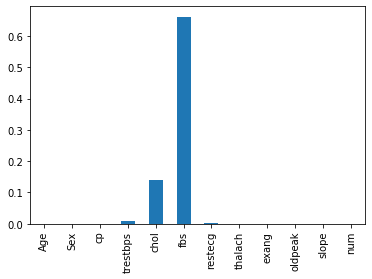

In [12]:
pvalue1.plot.bar()

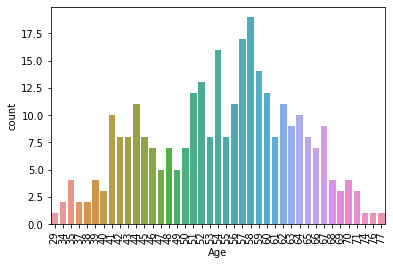

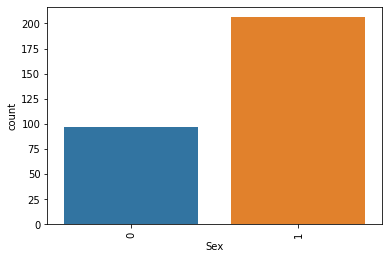

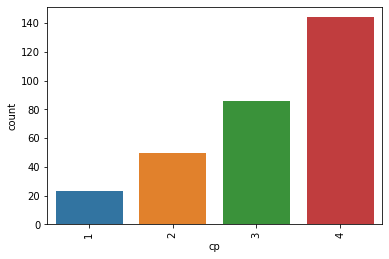

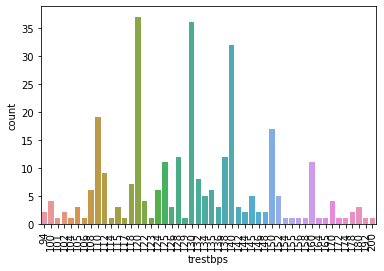

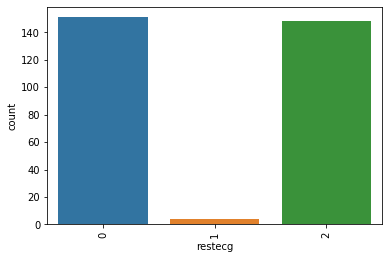

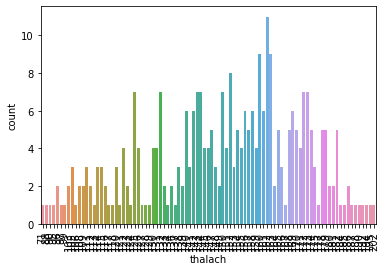

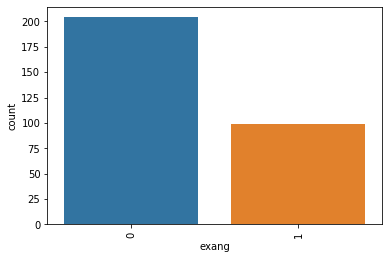

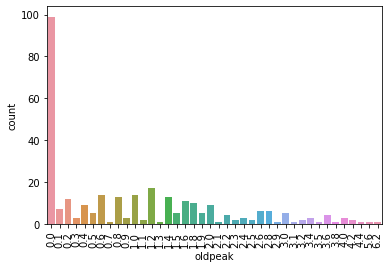

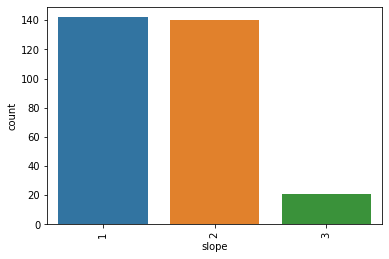

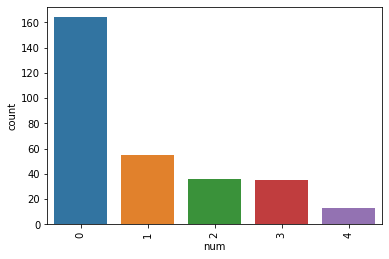

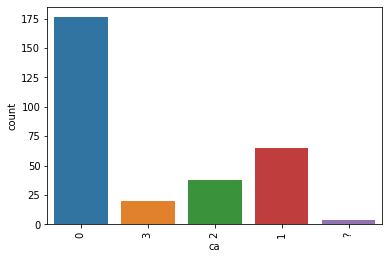

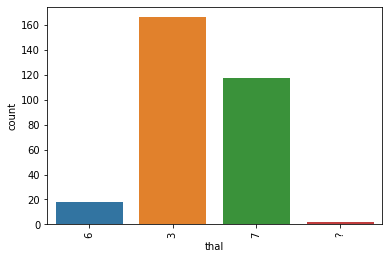

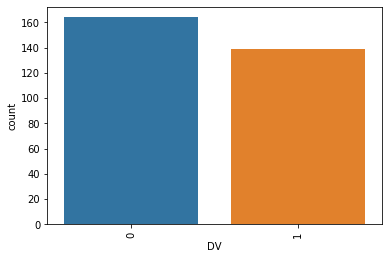

In [13]:
labels=['Age','Sex','cp','trestbps','restecg','thalach','exang','oldpeak','slope','num','ca','thal','DV']
for i in range(len(labels)):
    plt.figure()
    sns.countplot(x=data[labels[i]])
    plt.xlabel(labels[i])
    plt.xticks(rotation=90)

In [14]:
data.nunique()

Age          41
Sex           2
cp            4
trestbps     50
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
num           5
DV            2
dtype: int64

In [15]:
data['ca'].value_counts()

0    176
1     65
2     38
3     20
?      4
Name: ca, dtype: int64

In [16]:
data['thal'].value_counts()

3    166
7    117
6     18
?      2
Name: thal, dtype: int64

In [17]:
data['ca'].unique()

array(['0', '3', '2', '1', '?'], dtype=object)

In [18]:
data['thal'].unique()

array(['6', '3', '7', '?'], dtype=object)

In [19]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
data['ca']=lb.fit_transform(data['ca'])
data['thal']=lb.fit_transform(data['thal'])

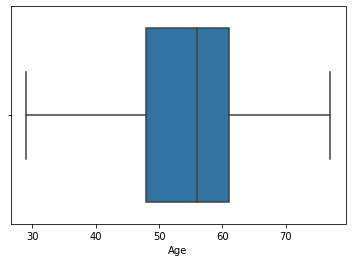

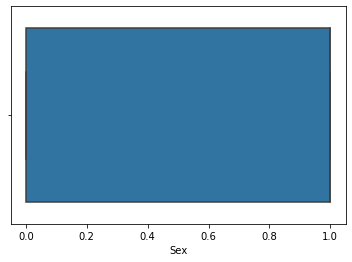

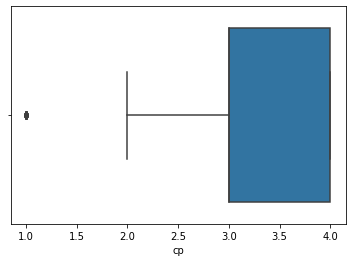

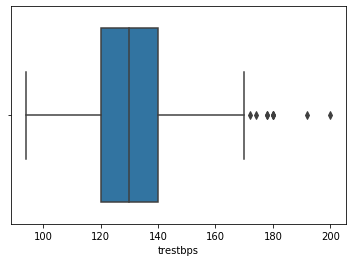

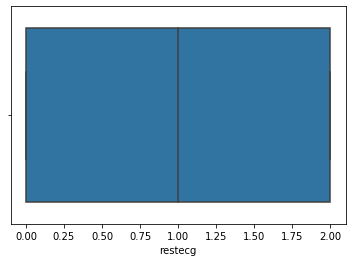

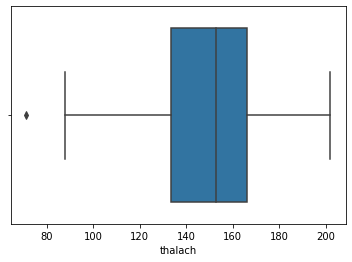

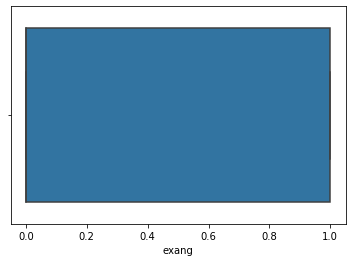

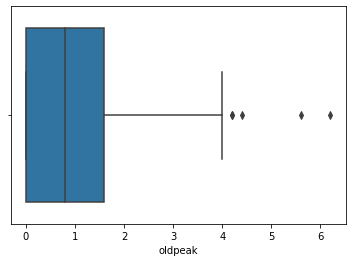

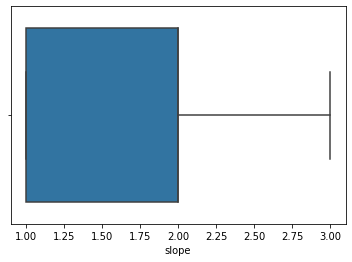

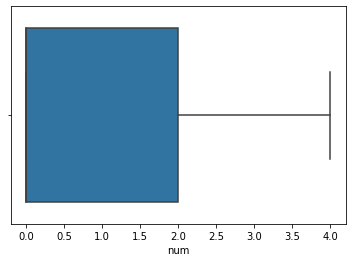

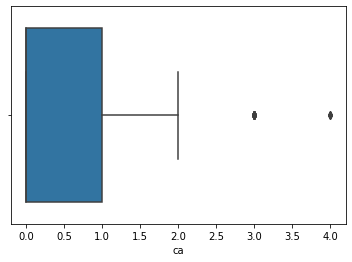

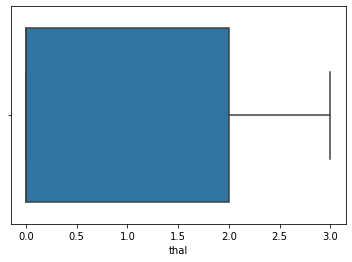

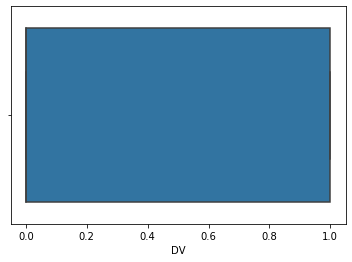

In [20]:
for i in range(len(labels)):
    plt.figure()
    sns.boxplot(data[labels[i]])
    plt.xlabel(labels[i])

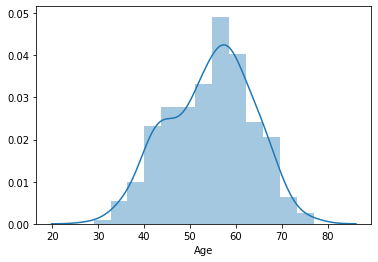

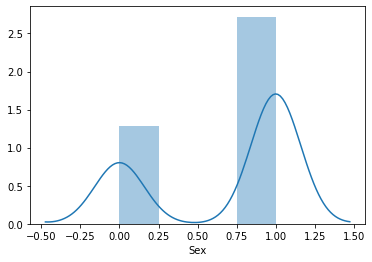

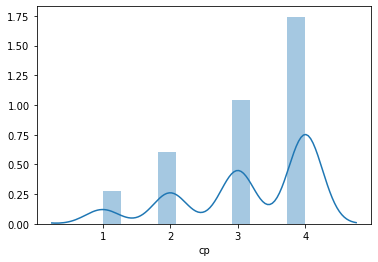

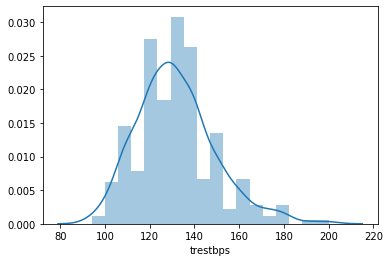

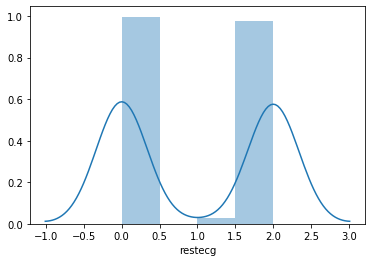

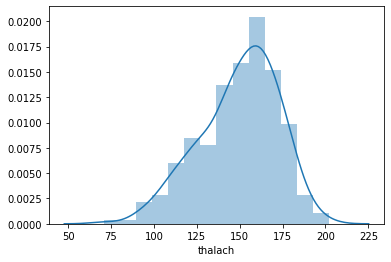

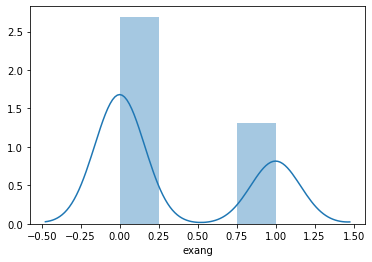

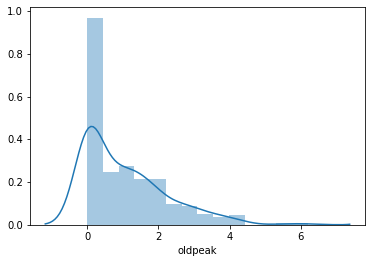

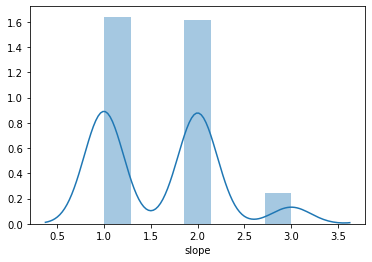

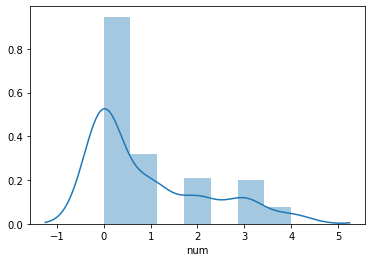

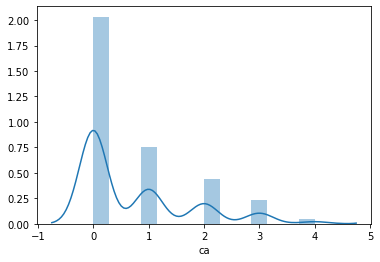

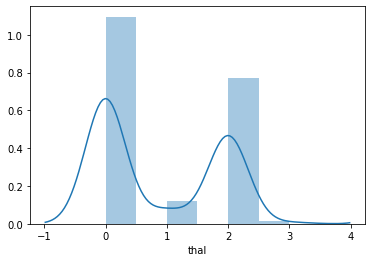

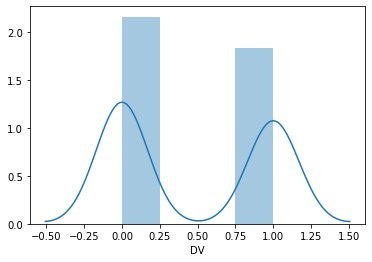

In [21]:
for i in range(len(labels)):
    plt.figure()
    sns.distplot(data[labels[i]])
    plt.xlabel(labels[i])

In [22]:
X=data[['ca','thal']]
Y=data['DV']

In [23]:
from sklearn.feature_selection import chi2
chi_scores= chi2(X,Y)
chi_scores

(array([70.08756488, 86.97444013]), array([5.67294609e-17, 1.09932770e-20]))

In [24]:
pvalue=pd.Series(chi_scores[1],index=X.columns)
pvalue=pvalue.sort_values(ascending=False,inplace=False)
pvalue

ca      5.672946e-17
thal    1.099328e-20
dtype: float64

In [25]:
labels=['Age','Sex','cp','trestbps','restecg','thalach','exang','oldpeak','slope','num','DV']
sk=[]
for i in labels:
    sk.append(data[i].skew())
a=pd.DataFrame({'Variable':labels,'Skew':sk})
a

,Variable,Skew
0,Age,-0.209060
1,Sex,-0.774935
2,cp,-0.841754
3,trestbps,0.706035
4,restecg,0.019900
5,thalach,-0.537449
6,exang,0.742532
7,oldpeak,1.269720
8,slope,0.508316
9,num,1.058496


In [26]:
X=data.drop(['DV'],axis=1)
Y=data['DV']

In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x= sc.fit_transform(X)
x

array([[ 0.94872647,  0.68620244, -2.25177456, ..., -0.71312935,
         0.15331686, -0.76419779],
       [ 1.39200191,  0.68620244,  0.87798549, ...,  2.27412678,
        -0.87901666,  0.86644961],
       [ 1.39200191,  0.68620244,  0.87798549, ...,  1.27837473,
         1.18565038,  0.05112591],
       ...,
       [ 0.28381332,  0.68620244,  0.87798549, ...,  0.28262269,
         1.18565038,  1.68177331],
       [ 0.28381332, -1.4572959 , -1.20852121, ...,  0.28262269,
        -0.87901666,  0.05112591],
       [-1.82174501,  0.68620244, -0.16526786, ...,  3.26987882,
        -0.87901666, -0.76419779]])

In [28]:
scaled_df=pd.DataFrame(x,index=X.index, columns=X.columns)
scaled_df

,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,0.948726,0.686202,-2.251775,0.757525,-0.264900,2.394438,1.016684,0.017197,-0.696631,1.087338,2.274579,-0.713129,0.153317,-0.764198
1,1.392002,0.686202,0.877985,1.611220,0.760415,-0.417635,1.016684,-1.821905,1.435481,0.397182,0.649113,2.274127,-0.879017,0.866450
2,1.392002,0.686202,0.877985,-0.665300,-0.342283,-0.417635,1.016684,-0.902354,1.435481,1.346147,0.649113,1.278375,1.185650,0.051126
3,-1.932564,0.686202,-0.165268,-0.096170,0.063974,-0.417635,-0.996749,1.637359,-0.696631,2.122573,2.274579,-0.713129,-0.879017,-0.764198
4,-1.489288,-1.457296,-1.208521,-0.096170,-0.825922,-0.417635,1.016684,0.980537,-0.696631,0.310912,-0.976352,-0.713129,-0.879017,-0.764198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,-1.046013,0.686202,-2.251775,-1.234430,0.334813,-0.417635,-0.996749,-0.770990,-0.696631,0.138373,0.649113,-0.713129,1.185650,0.051126
299,1.502821,0.686202,0.877985,0.700612,-1.038723,2.394438,-0.996749,-0.376896,-0.696631,2.036303,0.649113,1.278375,1.185650,0.866450
300,0.283813,0.686202,0.877985,-0.096170,-2.238149,-0.417635,-0.996749,-1.515388,1.435481,0.138373,0.649113,0.282623,1.185650,1.681773
301,0.283813,-1.457296,-1.208521,-0.096170,-0.206864,-0.417635,1.016684,1.068113,-0.696631,-0.896862,0.649113,0.282623,-0.879017,0.051126


In [29]:
from sklearn.svm import SVC

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(scaled_df,Y,test_size=0.3,random_state=42)

In [31]:
model = SVC(kernel='sigmoid', C=1)
model.fit(X_train,Y_train)

SVC(C=1, kernel='sigmoid')

In [32]:
model.score(X_train,Y_train)

0.9716981132075472

In [33]:
model.score(X_test,Y_test)

0.989010989010989

In [34]:
pred=model.predict(X_test)

In [35]:
pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0], dtype=int64)

In [36]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [37]:
confusion_matrix(Y_test,pred)

array([[47,  1],
       [ 0, 43]], dtype=int64)

In [38]:
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        48
           1       0.98      1.00      0.99        43

    accuracy                           0.99        91
   macro avg       0.99      0.99      0.99        91
weighted avg       0.99      0.99      0.99        91

